# plots_1d Module Examples

This notebook demonstrates all functions in the `neural_analysis.plotting.plots_1d` module:
- `plot_line()` - Basic 1D line plots with optional error bands
- `plot_multiple_lines()` - Multiple lines on same axes  
- `plot_boolean_states()` - Visualize boolean states over time

All functions support both **matplotlib** (static) and **plotly** (interactive) backends.

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

from neural_analysis.plotting import (
    plot_line,
    plot_multiple_lines, 
    plot_boolean_states,
    PlotConfig,
    set_backend
)

# Set random seed for reproducibility
np.random.seed(42)

## 1. Basic Line Plot with `plot_line()`

The simplest usage - plot a 1D array with default settings.

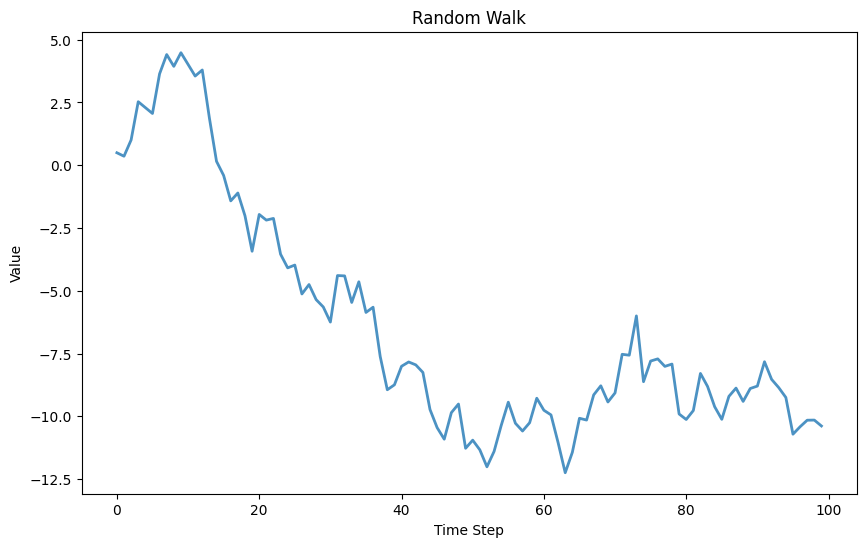

In [15]:
# Generate sample data
data = np.random.randn(100).cumsum()

# Create simple line plot
config = PlotConfig(title="Random Walk", xlabel="Time Step", ylabel="Value")
plot_line(data, config=config, backend='matplotlib')
plt.show()

## 2. Line Plot with Error Bands

Add standard deviation bands to show uncertainty.

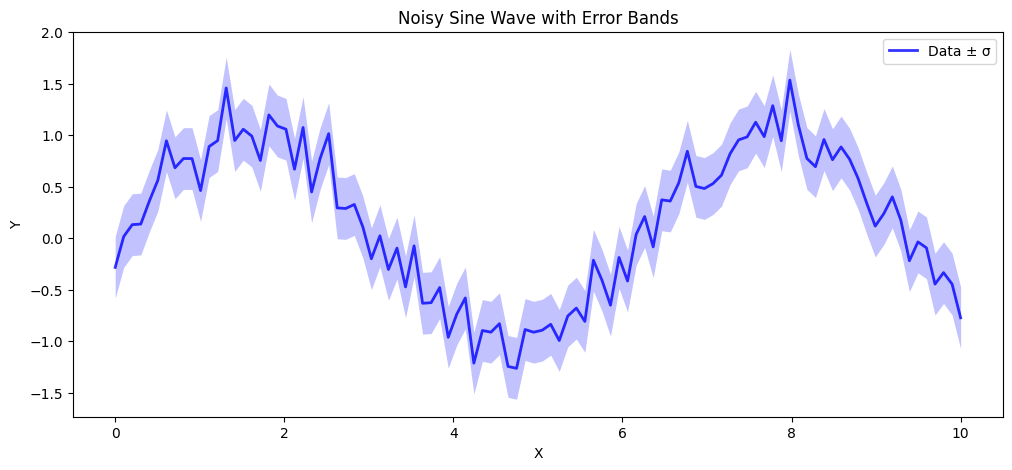

In [16]:
# Generate data with uncertainty
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.randn(100) * 0.2
std = np.ones(100) * 0.3  # Constant std

# Plot with error bands
config = PlotConfig(
    title="Noisy Sine Wave with Error Bands",
    xlabel="X", 
    ylabel="Y",
    figsize=(12, 5)
)
plot_line(y, x=x, std=std, config=config, color='blue', label='Data ± σ')
plt.show()

## 3. Multiple Lines with `plot_multiple_lines()`

Compare multiple signals on the same plot.

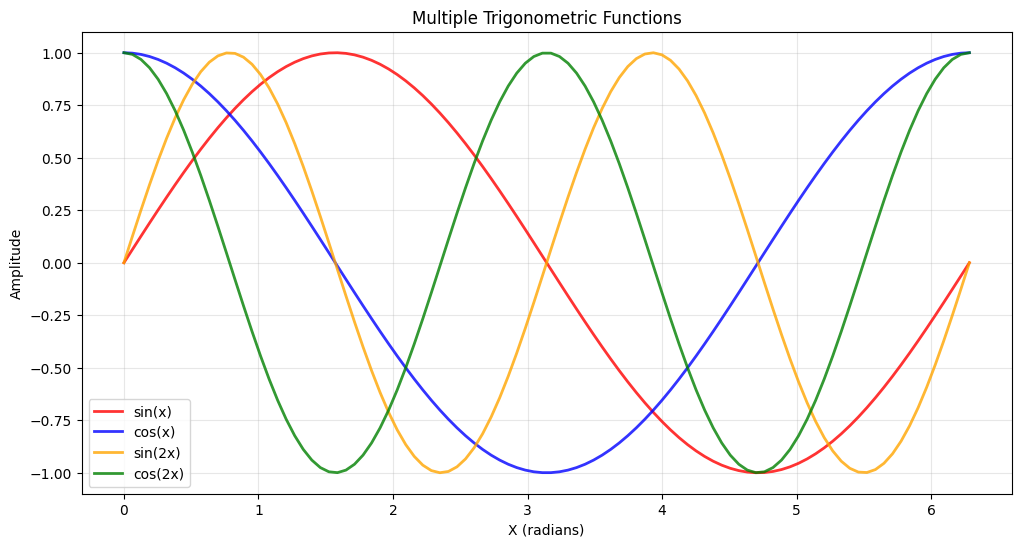

In [17]:
# Generate multiple signals
x = np.linspace(0, 2*np.pi, 100)
data_dict = {
    'sin(x)': np.sin(x),
    'cos(x)': np.cos(x),
    'sin(2x)': np.sin(2*x),
    'cos(2x)': np.cos(2*x)
}

# Plot multiple lines
config = PlotConfig(
    title="Multiple Trigonometric Functions",
    xlabel="X (radians)",
    ylabel="Amplitude",
    figsize=(12, 6),
    grid=True
)
colors = ['red', 'blue', 'orange', 'green']
plot_multiple_lines(data_dict, x=x, config=config, colors=colors, backend='matplotlib')
plt.show()

## 5. Boolean States with `plot_boolean_states()`

Visualize behavioral or experimental states over time.

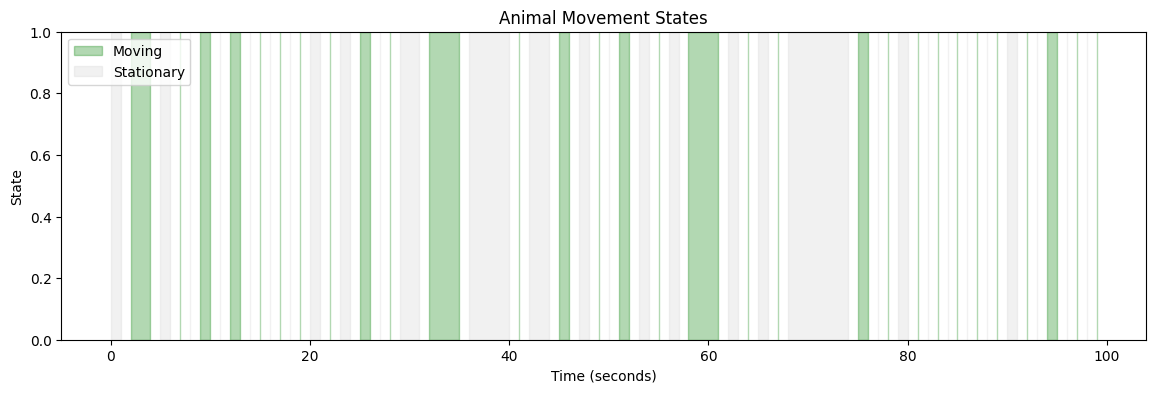

In [19]:
# Simulate behavioral states (e.g., animal moving vs stationary)
time = np.arange(0, 100)
is_moving = np.random.rand(100) > 0.6  # 40% of time moving

# Plot boolean states
config = PlotConfig(
    title="Animal Movement States",
    xlabel="Time (seconds)",
    ylabel="State",
    figsize=(14, 4)
)
plot_boolean_states(
    is_moving,
    x=time,
    config=config,
    true_color='green',
    false_color='lightgray',
    true_label='Moving',
    false_label='Stationary',
    backend='matplotlib'
)
plt.show()

## 6. Custom Styling with Markers and Linestyles

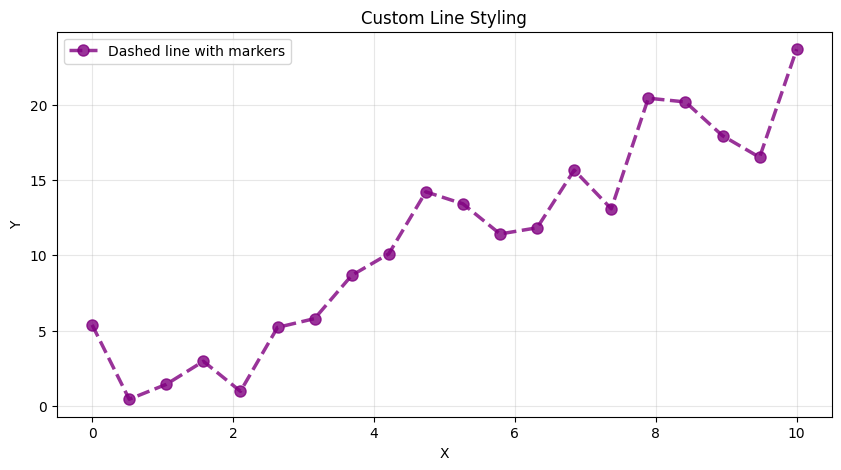

In [20]:
# Sample data with custom styling
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.randn(20) * 2

config = PlotConfig(
    title="Custom Line Styling",
    xlabel="X",
    ylabel="Y",
    figsize=(10, 5),
    grid=True
)

plot_line(
    y,
    x=x,
    config=config,
    color='purple',
    linewidth=2.5,
    linestyle='--',
    marker='o',
    markersize=8,
    label='Dashed line with markers',
    backend='matplotlib'
)
plt.show()

## 7. Interactive Plotly Backend

All functions support interactive plotly plots for exploration.

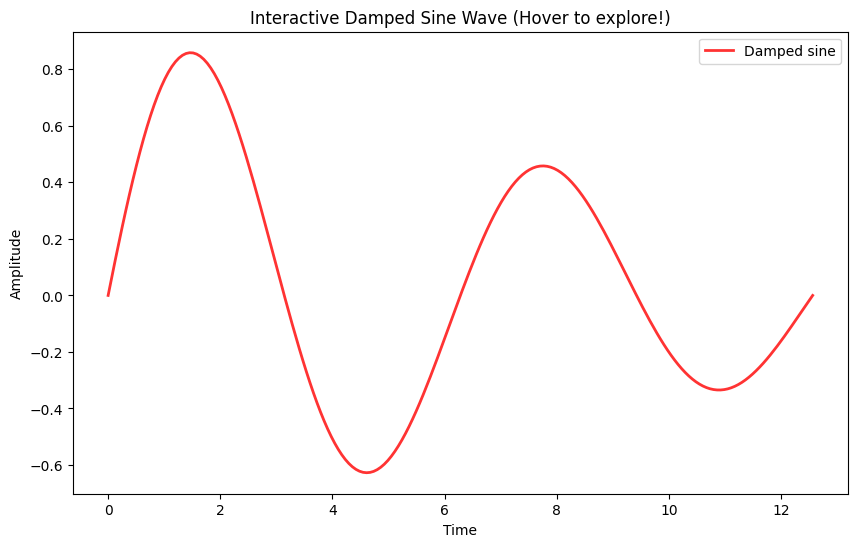

In [4]:
# Generate interactive plot with plotly
x = np.linspace(0, 4*np.pi, 200)
y = np.sin(x) * np.exp(-x/10)

set_backend('matplotlib')
config = PlotConfig(
    title="Interactive Damped Sine Wave (Hover to explore!)",
    xlabel="Time",
    ylabel="Amplitude",
    show=False  # Don't auto-show
)
plot_line(y, x=x, config=config, color='red', label='Damped sine', backend='matplotlib')
plt.show()

set_backend('plotly')
config = PlotConfig(
    title="Interactive Damped Sine Wave (Hover to explore!)",
    xlabel="Time",
    ylabel="Amplitude",
    show=False  # Don't auto-show
)

# Create interactive plotly figure  
fig = plot_line(y, x=x, config=config, color='red', label='Damped sine', backend='plotly')
fig.show()


## Summary

The `plots_1d` module provides:

✅ **Flexible backends**: Switch between matplotlib (static) and plotly (interactive)  
✅ **Error visualization**: Add confidence bands with `std` parameter  
✅ **Multiple datasets**: Compare multiple signals easily  
✅ **Custom styling**: Full control over colors, markers, linestyles  
✅ **Domain-specific functions**: Specialized plots for loss curves and boolean states

### Next Steps

- Explore the `plots_2d` module for scatter plots and 2D visualizations
- Check `embeddings` module for dimensionality reduction plots
- See `heatmaps` module for matrix visualizations

For full API documentation, see the module docstrings or visit the documentation site.